In [1]:
pip install -U tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.9 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import tensorflow
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D,BatchNormalization,Add,Input,ReLU,ELU,LayerNormalization
from tensorflow_addons.layers import GroupNormalization
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from keras.datasets import cifar10
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()
cifar10_labels = ["airplane",
                 "automobile",
                 "bird",
                 "cat",
                 "deer",
                 "dog",
                 "frog",
                 "horse",
                 "ship",
                 "truck"]

170498071/170498071 [==============================] - 2s 0us/step


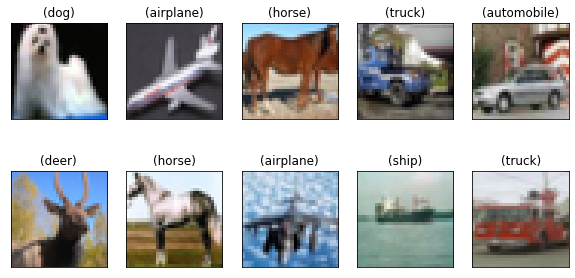

In [4]:
figure = plt.figure(figsize=(10, 5))
for i, index in enumerate(np.random.choice(X_train.shape[0], size = 10, replace = False)):
    img = figure.add_subplot(2, 5, i + 1, xticks = [], yticks = [])
    # Displaying each image
    img.imshow(np.squeeze(X_train[index]))
    true_index = (Y_train[index])[0]
    # Setting the title for each image
    img.set_title("({})".format(cifar10_labels[true_index]))

In [5]:
#Data_normalization
x_train = X_train.astype('float32') / 255
x_test = X_test.astype('float32') / 255
# # Converting RGB to Grayscale
# x_train = np.mean(x_train, axis=3)
# x_test= np.mean(x_test, axis=3)
y_train = keras.utils.to_categorical(Y_train, 10)
y_test = keras.utils.to_categorical(Y_test, 10)
datagen=ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,validation_split=0.2)
datagen.fit(x_train)

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
# plt.subplot(1, 2, 1)
# plt.imshow(X_train[12])
# plt.title('(RGB)')
# plt.subplot(1, 2, 2)
# plt.imshow(x_train[12].reshape(32,32), cmap = 'gray')
# plt.title('(grayscale)')

In [8]:
from keras import Model
from matplotlib.cbook import flatten
x1=Input((32,32,3))
x = Conv2D(32,(3,3),activation='elu',padding='same')(x1)
x = BatchNormalization()(x)
#x = LayerNormalization()(x)
#x = GroupNormalization(32,axis=3)(x)
x = Conv2D(64,(3,3),padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = ELU()(x)
r1=Conv2D(64,(3,3),activation='elu',padding='same')(x)
r1=Conv2D(64,(3,3),activation='elu',padding='same')(x)
L1=Add()([x,r1])
L1=BatchNormalization()(L1)
#L1 = LayerNormalization()(L1)
#L1 = GroupNormalization(32,axis=3)(L1)
L2=Conv2D(128,(3,3),padding='same')(L1)
L2=MaxPooling2D((2,2))(L2)
L2=ELU()(L2)
L2=Conv2D(256,(3,3),padding='same')(L2)
L2=MaxPooling2D((2,2))(L2)
L2=ELU()(L2)
r2=Conv2D(256,(3,3),activation='elu',padding='same')(L2)
r2=Conv2D(256,(3,3),activation='elu',padding='same')(r2)
L3=Add()([L2,r2])
L3=BatchNormalization()(L3)
#L3 = LayerNormalization()(L3)
#L3 = GroupNormalization(32,axis=3)(L3)
out=MaxPooling2D((3,3))(L3)
out=Flatten()(out)
out=Dense(10, activation="softmax")(out)
model=Model(x1,out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   18496       ['batch_normalization[0][0]']

In [9]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
import  time
startingPoint=time.time()
trainedModel = model.fit(datagen.flow(x_train, y_train, batch_size = 512,subset='training',shuffle=True), epochs = 25,
                         validation_data=datagen.flow(x_train, y_train,batch_size=512, subset='validation'))

Epoch 1/25
79/79 [==============================] - 36s 300ms/step - loss: 1.8428 - accuracy: 0.3460 - val_loss: 2.3111 - val_accuracy: 0.1245
Epoch 2/25
79/79 [==============================] - 24s 301ms/step - loss: 1.5446 - accuracy: 0.4494 - val_loss: 2.6437 - val_accuracy: 0.1138
Epoch 3/25
79/79 [==============================] - 23s 287ms/step - loss: 1.4502 - accuracy: 0.4830 - val_loss: 2.5797 - val_accuracy: 0.1535
Epoch 4/25
79/79 [==============================] - 23s 290ms/step - loss: 1.3825 - accuracy: 0.5092 - val_loss: 2.3733 - val_accuracy: 0.2290
Epoch 5/25
79/79 [==============================] - 23s 292ms/step - loss: 1.3323 - accuracy: 0.5294 - val_loss: 1.9740 - val_accuracy: 0.3241
Epoch 6/25
79/79 [==============================] - 23s 289ms/step - loss: 1.2855 - accuracy: 0.5473 - val_loss: 1.7461 - val_accuracy: 0.3820
Epoch 7/25
79/79 [==============================] - 23s 294ms/step - loss: 1.2526 - accuracy: 0.5583 - val_loss: 1.3879 - val_accuracy: 0.5130

In [11]:
total=time.time()-startingPoint
print('runtime=',total,'seconds')

runtime= 644.1972908973694 seconds


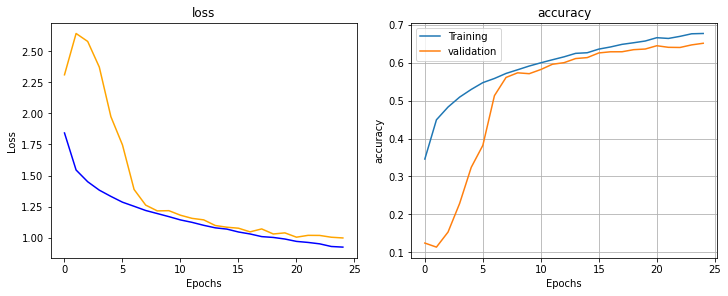

In [12]:
loss_train = trainedModel.history['loss']
loss_val = trainedModel.history['val_loss']
accu_train = trainedModel.history['accuracy']
accu_val = trainedModel.history['val_accuracy']
epochs=range(25)
f,ax=plt.subplots(1,2,figsize=(10,4),constrained_layout=True)
ax[0].plot(epochs, loss_train,color='blue', label='Training loss')
ax[0].plot(epochs, loss_val,color='orange', label='validation loss')
ax[0].set(title='loss',xlabel='Epochs',ylabel='Loss')
ax[1].plot(epochs, accu_train, label='Training')
ax[1].plot(epochs, accu_val, label='validation')
ax[1].set(title='accuracy',xlabel='Epochs',ylabel='accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test_loss:', test_loss)
print('Test_accuracy:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 1.0168 - accuracy: 0.6606
Test_loss: 1.0168373584747314
Test_accuracy: 0.6606000065803528
